In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
from time import time

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

## Случайные процессы. Пример выполнения второй части практического задания 3.

**Задача:**

Поставить гипотезу на функцию $f(t)$, которая удовлетворяет условию
$$\mathsf{P}\left(\limsup_t\frac{\left|W_t\right|}{f(t)} = 1\right)=1$$

**Вопрос:**

Пусть есть некоторая функция $f(t)$.
Какое свойство можно проверить эмпирически, чтобы с большой вероятностью сказать, что $f(t)$ удовлетворяет требуемому условию?

**Ответ:**

...

--------------------------

Сначала проведем исследование не для всего времени и не для всех процессов.

**Вопрос:**

Зачем это нужно?

**Ответ:**

...

--------------------------

Считайте данные из некоторых файлов, но не все!

In [2]:
max_time = 20000
path_count = 50  # можно поменять
t = np.arange(0, max_time, 0.1)
paths = np.zeros((path_count, 10 * max_time))

for i in range(5):
    paths[i*10:(i+1)*10] = np.loadtxt('data/winer_paths_' + str(i + 1) + '.txt')[:, :10 * max_time]

Изобразим все это на графике.

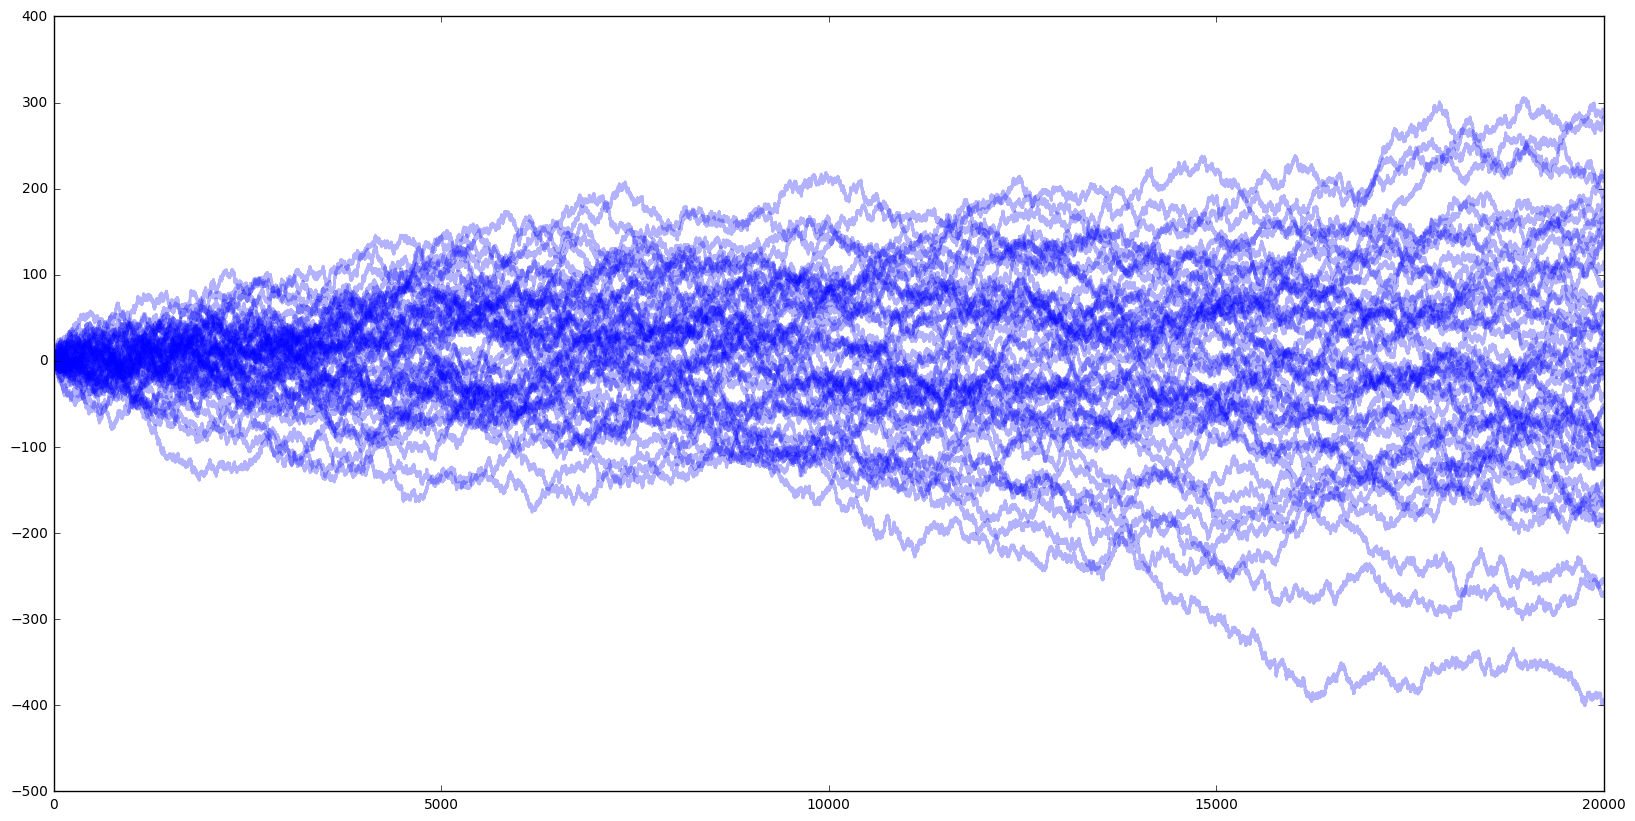

CPU times: user 6.79 s, sys: 122 ms, total: 6.91 s
Wall time: 6.95 s


In [3]:
%%time

plt.figure(figsize=(20, 10))
for i in range(path_count):
    plt.plot(t, paths[i], lw=2, alpha=0.3, color='blue')
plt.show()

Разными цветами. Бессмысленно, но красиво.

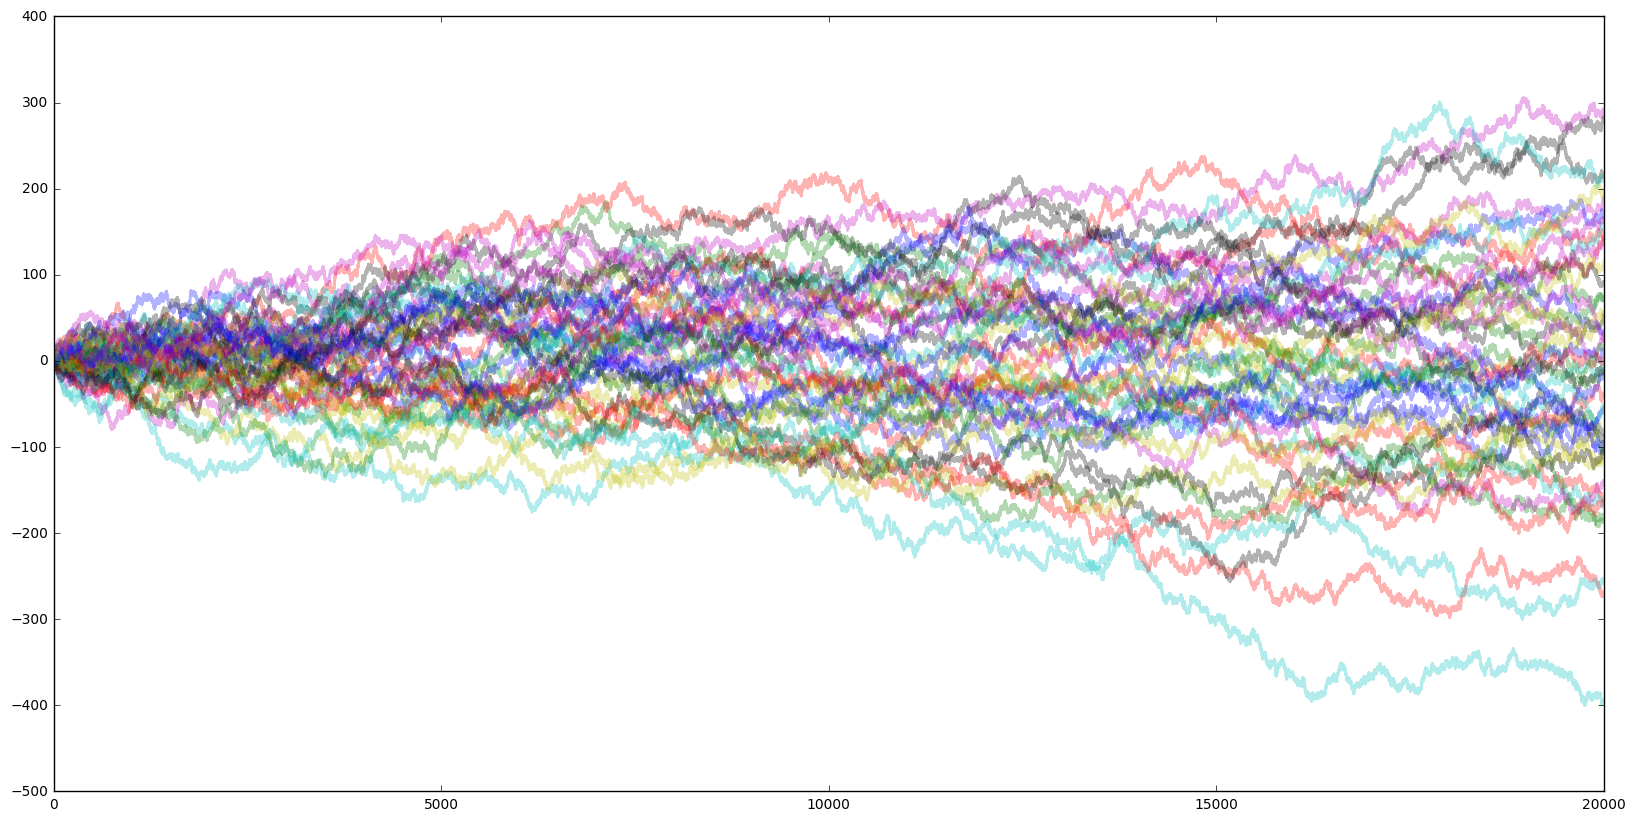

In [4]:
plt.figure(figsize=(20, 10))
for i in range(path_count):
    plt.plot(t, paths[i], lw=2, alpha=0.3)
plt.show()

Поскольку все свойства симметричны относительно оси абсцисс, будем рассматривать модули траекторий.

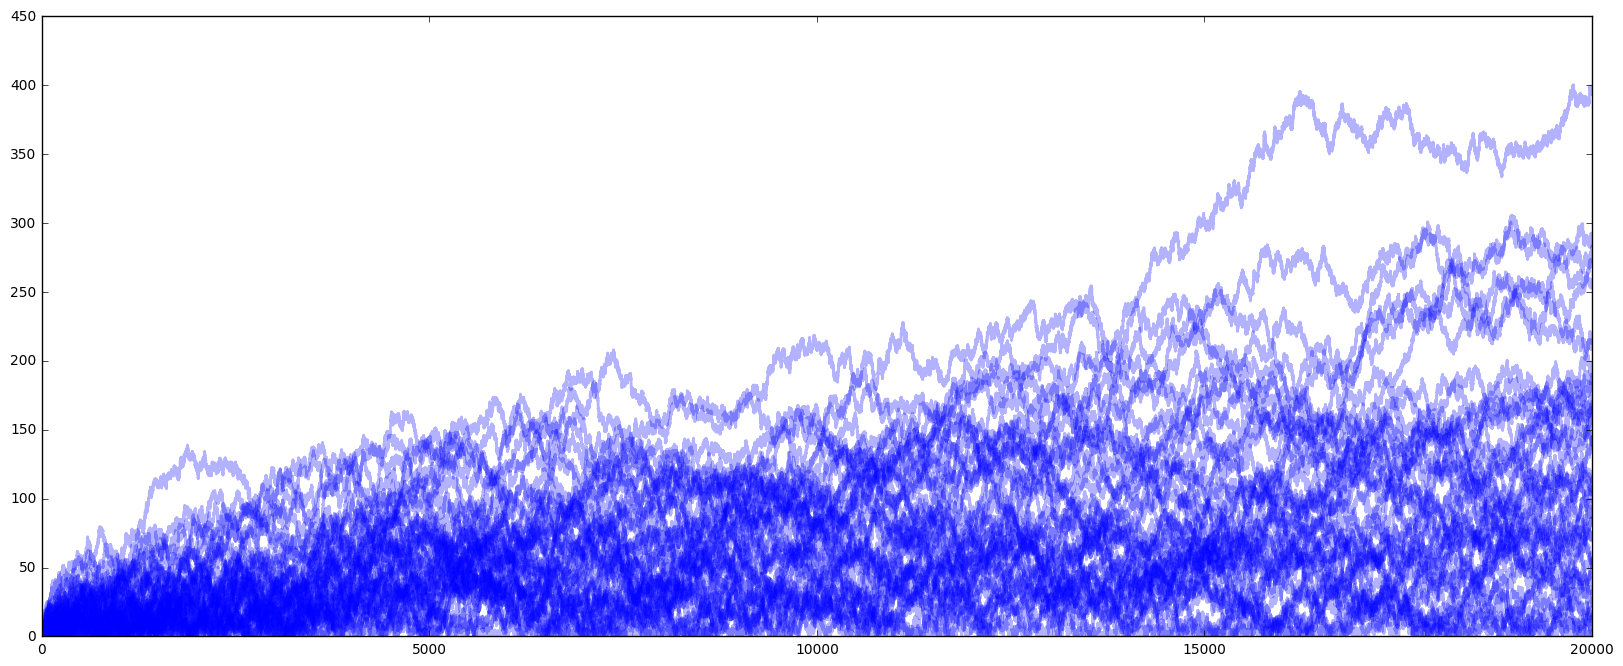

In [5]:
t = np.arange(0, max_time, 0.1)
plt.figure(figsize=(20, 8))
for i in range(path_count):
    plt.plot(t, np.abs(paths[i]), lw=2, alpha=0.3, color='blue')
plt.show()

Нарисовав все траектории полупрозрачными линиями на одном графике, мы уже можем примерно обозначить область, в которой п.н. проходят траектории процесса.

Для начала заметим, что функция должна быть вогнутой, то есть рости медленнее линейной. Проверим это, нарисовав приближение кусочно-линейной функцией.

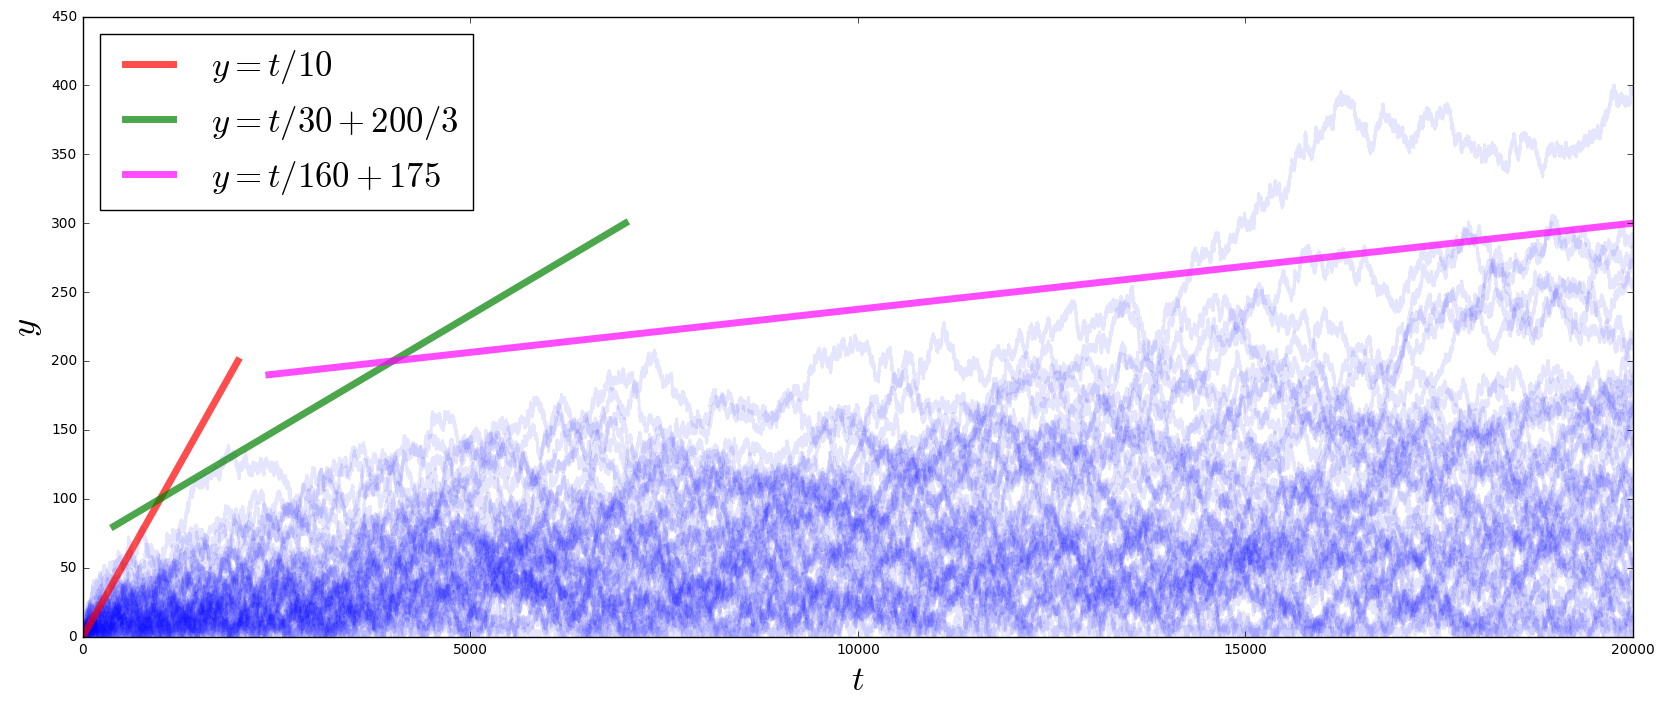

In [6]:
plt.figure(figsize=(20, 8))
for i in range(path_count):
    plt.plot(t, np.abs(paths[i]), lw=2, alpha=0.1, color='blue')
plt.plot([0, 1000, 2000], [0, 100, 200], lw=5, alpha=0.7, color='red', label='$y=t/10$')
plt.plot([400, 1000, 4000, 7000], [80, 100, 200, 300], lw=5, alpha=0.7, color='green', label='$y=t/30 + 200/3$')
plt.plot([2400, 4000, 20000], [190, 200, 300], lw=5, alpha=0.7, color='magenta', label='$y=t/160 + 175$')
plt.legend(loc=2, fontsize=25)
plt.xlabel('$t$', fontsize=25)
plt.ylabel('$y$', fontsize=25)
plt.show()

**Вопрос:**

Какие вогнутые функции (с точностью до константы) можно взять?

...

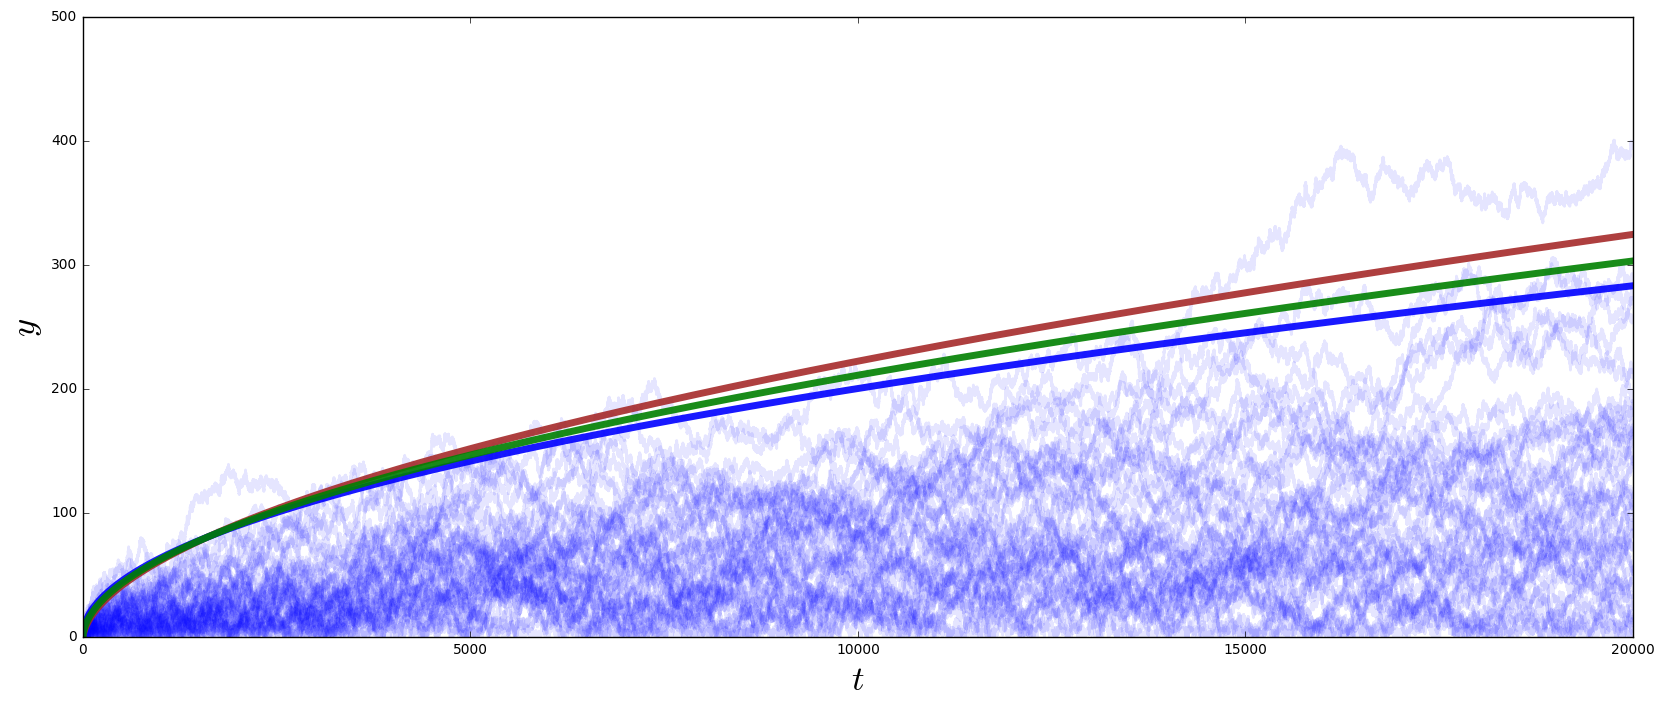

In [7]:
# ШАБЛОН ПОДБОРА ФУНКЦИЙ (используйте цвета: red, green, magenta, brown)

plt.figure(figsize=(20, 8))
for i in range(path_count):
    plt.plot(t, np.abs(paths[i]), lw=2, alpha=0.1, color='blue')
    
plt.plot(t, (np.log(np.log(t))) * (t**0.5), lw=5, alpha=0.9, color='brown')
plt.plot(t, 2 * (t**0.5), lw=5, alpha=0.9)
plt.plot(t, ((2. * t * np.log(np.log(t))) ** 0.5), lw=5, alpha=0.9)

plt.ylim((0, 500))
plt.legend(loc=2, fontsize=25, ncol=2)
plt.xlabel('$t$', fontsize=25)
plt.ylabel('$y$', fontsize=25)
plt.show()

...

А это пригодится:

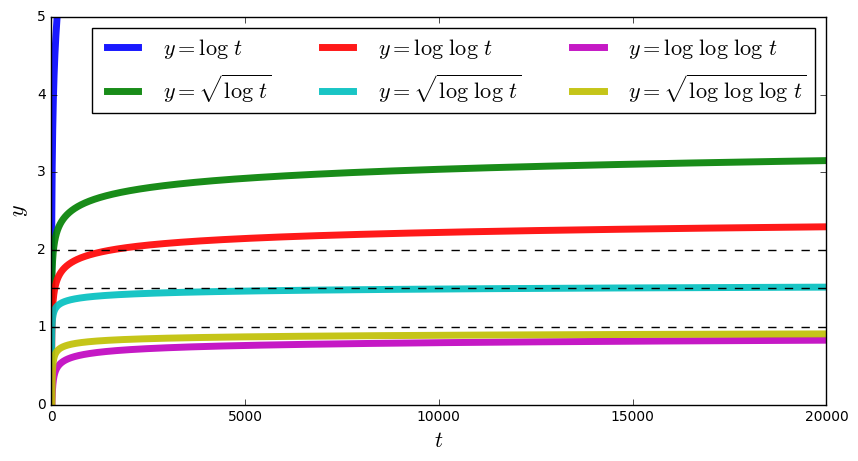

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(t, np.log(t), lw=5, alpha=0.9, label='$y=\log\ t$')
plt.plot(t, np.sqrt(np.log(t)), lw=5, alpha=0.9, label='$y=\sqrt{\log\ t}$')
plt.plot(t, np.log(np.log(t)), lw=5, alpha=0.9, label='$y=\log\ \log\ t$')
plt.plot(t, np.sqrt(np.log(np.log(t))), lw=5, alpha=0.9, label='$y=\sqrt{\log\ \log\ t}$')
plt.plot(t, np.log(np.log(np.log(t))), lw=5, alpha=0.9, label='$y=\log\ \log\ \log\ t$')
plt.plot(t, np.sqrt(np.log(np.log(np.log(t)))), lw=5, alpha=0.9, label='$y=\sqrt{\log\ \log\ \log\ t}$')
plt.plot([0, 20000], [1, 1], '--', color='black')
plt.plot([0, 20000], [1.5, 1.5], '--', color='black')
plt.plot([0, 20000], [2, 2], '--', color='black')
plt.legend(fontsize=16, ncol=3)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.ylim((0, 5))
plt.show()

К этому моменту должны быть подобраны некоторые функции.

Разобьем прямую на кусочки длины 100.
Для функции $y = f(t)$ для каждого участка оценим вероятность превышения траекторией границы $(1 + \varepsilon) f(t)$ и $(1 - \varepsilon) f(t)$ и построим для них доверительные интервалы.

**Вопрос:**

Напишите формулы некоторой оценки и доверительного интервала.

**Ответ:**

...

In [9]:
def intersection_distr(paths, t, f, cell_len=100):
    ''' 
    Для каждого отрезка времени длины cell_len вычисляет количество траекторий,
    значения которых выше границы f(t).
    paths - набор траекторий
    t - соответствующие моменты времени
    f - функция
    cell_len - длина отрезка времени
    '''
    
    cell_count = np.ceil(t.max() / cell_len)
    intersection_counts = np.zeros(cell_count)  # количетсво траекторий,
                                                # значения которых выше границы f(t)     
    for i in np.arange(cell_count):
        indexs =  (i * cell_len <= t) * (t < (i + 1) * cell_len)
        border = f(t[indexs])
        ######################
        # Вычислите intersection_counts
        for path in paths:
            intersection_counts[i] += ((np.abs(path[indexs]) >= border).sum() > 0)
        ######################
    
    return intersection_counts

def bayes_bern_est(sum_samples, max_value, alpha=0.95, a=1, b=1):
    '''
    Вычисляет байесовские оценке (точечную и интервальную) для бернуллиевских выборок с априором Beta(a, b).
    sum_samples - сумма элементов в каждой выборке
    max_value - максимальное значение суммы, совпадает с размером выборки
    alpha - уровень доверия
    a, b - параметры априорного распределения
    '''
    ######################
    # Вычислите точечную и интервальную оценки
    probs = (sum_samples + a) / (max_value + a + b)
    lower = sps.beta.ppf((1 - alpha) / 2, sum_samples + a, max_value - sum_samples + b)
    upper = sps.beta.ppf((1 + alpha) / 2, sum_samples + a, max_value - sum_samples + b)
    ######################
    return probs, lower, upper

def draw_intersection(paths, t, f, epsilon=0.1, figsize=(20, 8), f_descr='f(t)', fontsize=25):
    '''
    Вычисляет доверительные интервалы и строит график 
    для граничных функций (1 - epsilon) * f(t) и (1 + epsilon) * f(t).
    '''
    plt.figure(figsize=figsize)

    for sign, color in zip([1, -1], ['red', 'green']):
        intersection_counts = intersection_distr(paths, t, lambda t: (1 + sign * epsilon) * f(t))
        probs, lower, upper = bayes_bern_est(intersection_counts, paths.shape[0])
        plt.plot(np.arange(len(probs)), probs, lw=2, alpha=0.8, color=color,
                 label='${} {}$'.format(1 + sign * epsilon, f_descr))
        plt.fill_between(np.arange(len(probs)), lower, upper, alpha=0.1, color=color)

    plt.ylim((0, 0.5))
    plt.xlabel('$t / 100$', fontsize=fontsize)
    plt.ylabel('$prob$', fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.show()

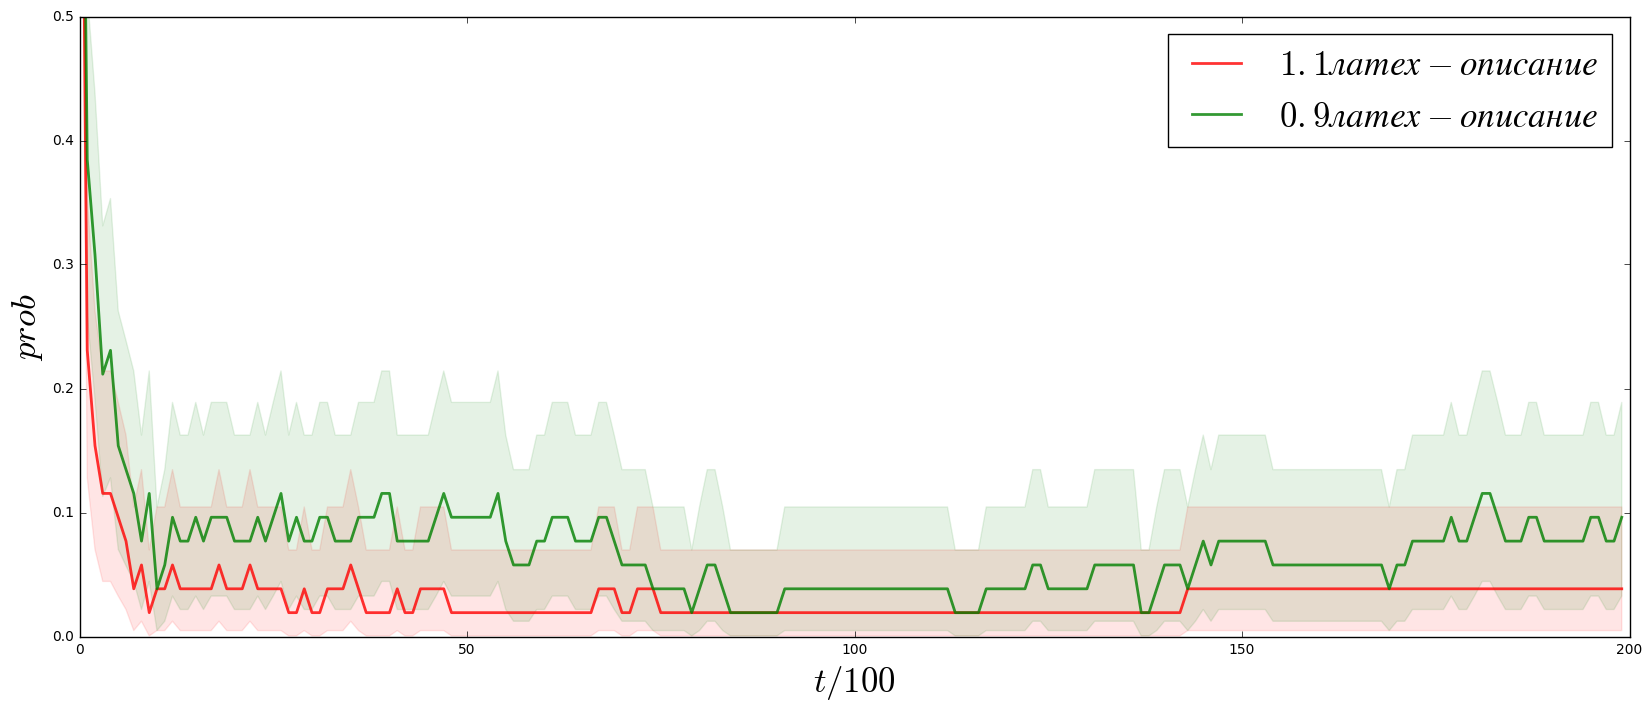

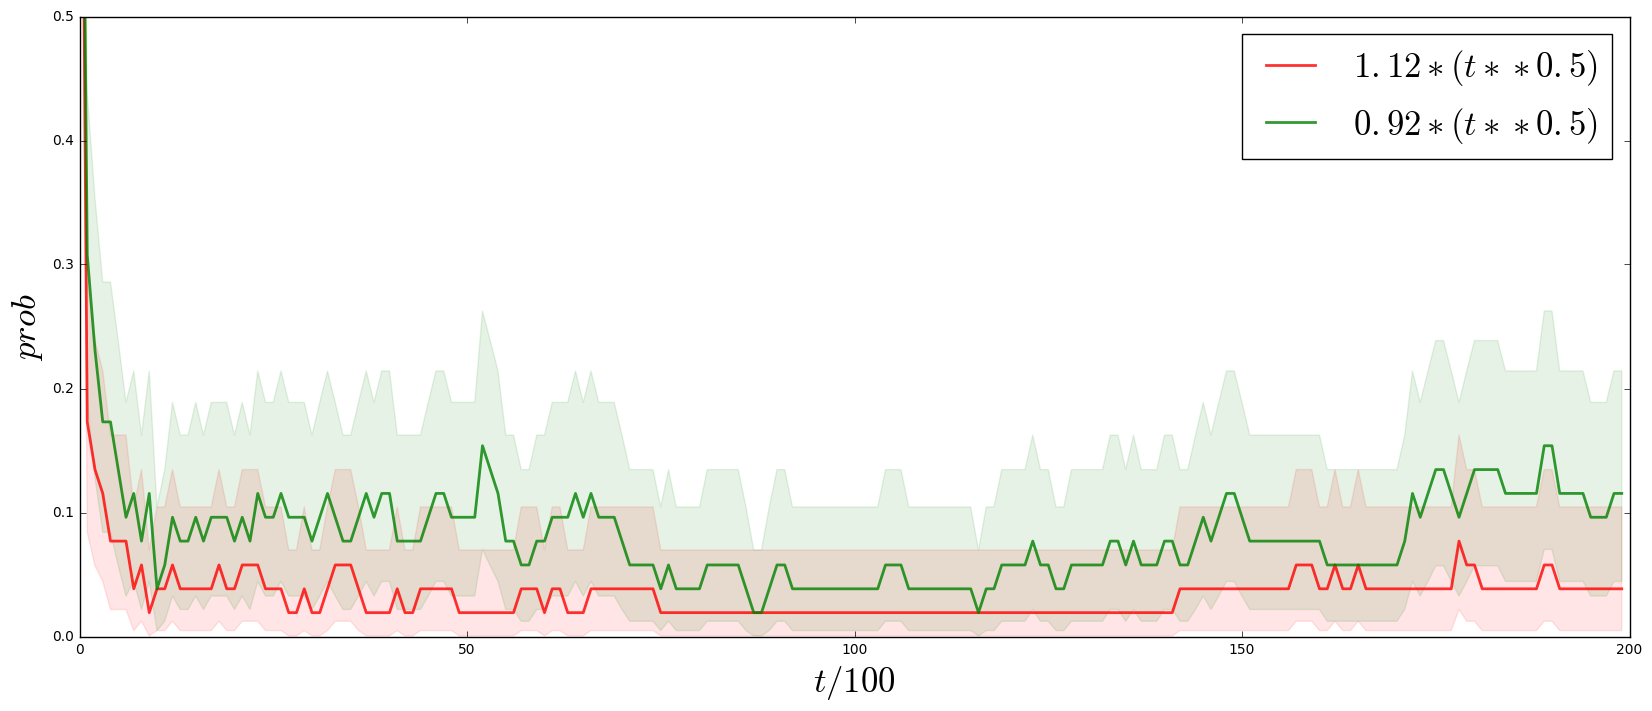

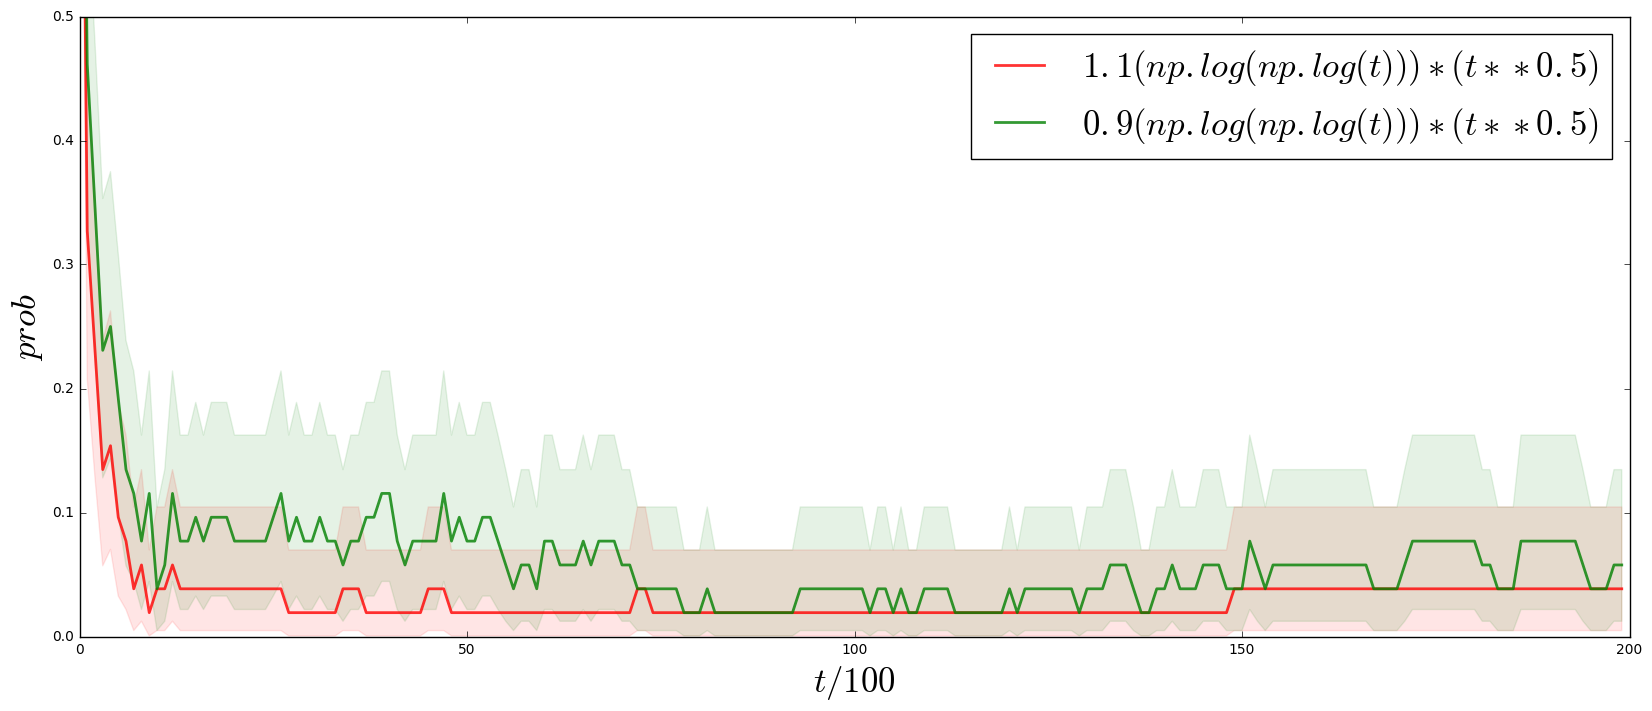

In [10]:
draw_intersection(paths, t, lambda t: ((2. * t * np.log(np.log(t))) ** 0.5), f_descr="латех-описание")
draw_intersection(paths, t, lambda t: 2 * (t**0.5), f_descr="2 * (t**0.5)")
draw_intersection(paths, t, lambda t: (np.log(np.log(t))) * (t**0.5), f_descr="(np.log(np.log(t))) * (t**0.5)")

Теперь загрузите все данные

In [11]:
max_time = 50000
path_count = 100
t = np.arange(0, max_time, 0.1)
paths = np.zeros((path_count, 10 * max_time))

for i in range(10):
    paths[i*10:(i+1)*10] = np.loadtxt('data/winer_paths_' + str(i + 1) + '.txt')

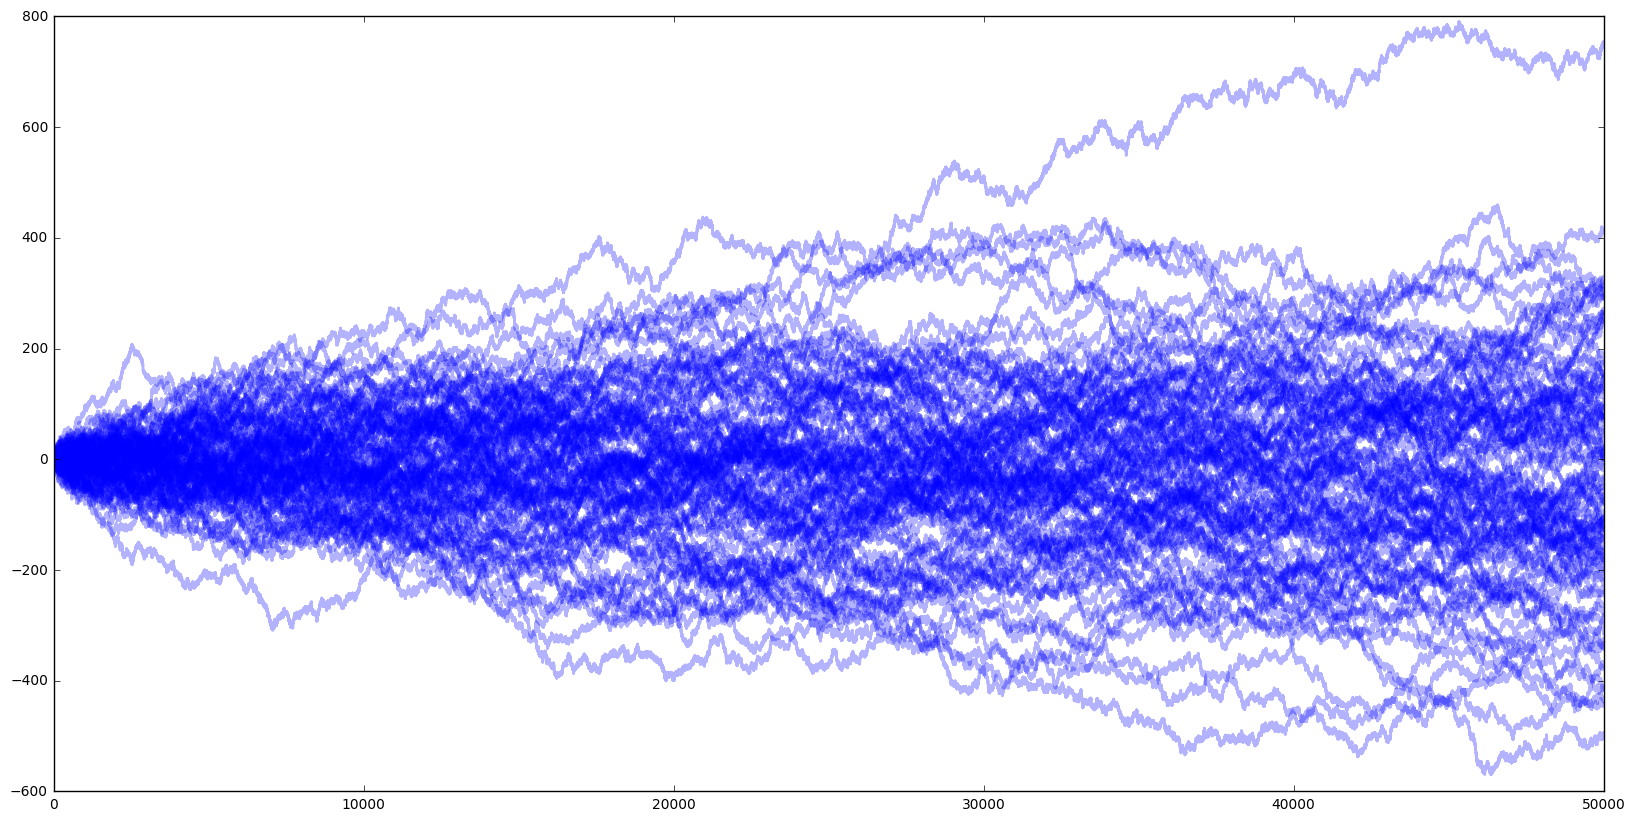

CPU times: user 22.1 s, sys: 912 ms, total: 23 s
Wall time: 23.7 s


In [12]:
%%time

plt.figure(figsize=(20, 10))
for i in range(path_count):
    plt.plot(t, paths[i], lw=2, alpha=0.3, color='blue')
plt.show()

Проверяем отобранные ранее функции.

...

In [13]:
...

Ellipsis

Теперь, оцениваем вероятности пересечения границы для некоторых граничных функций.

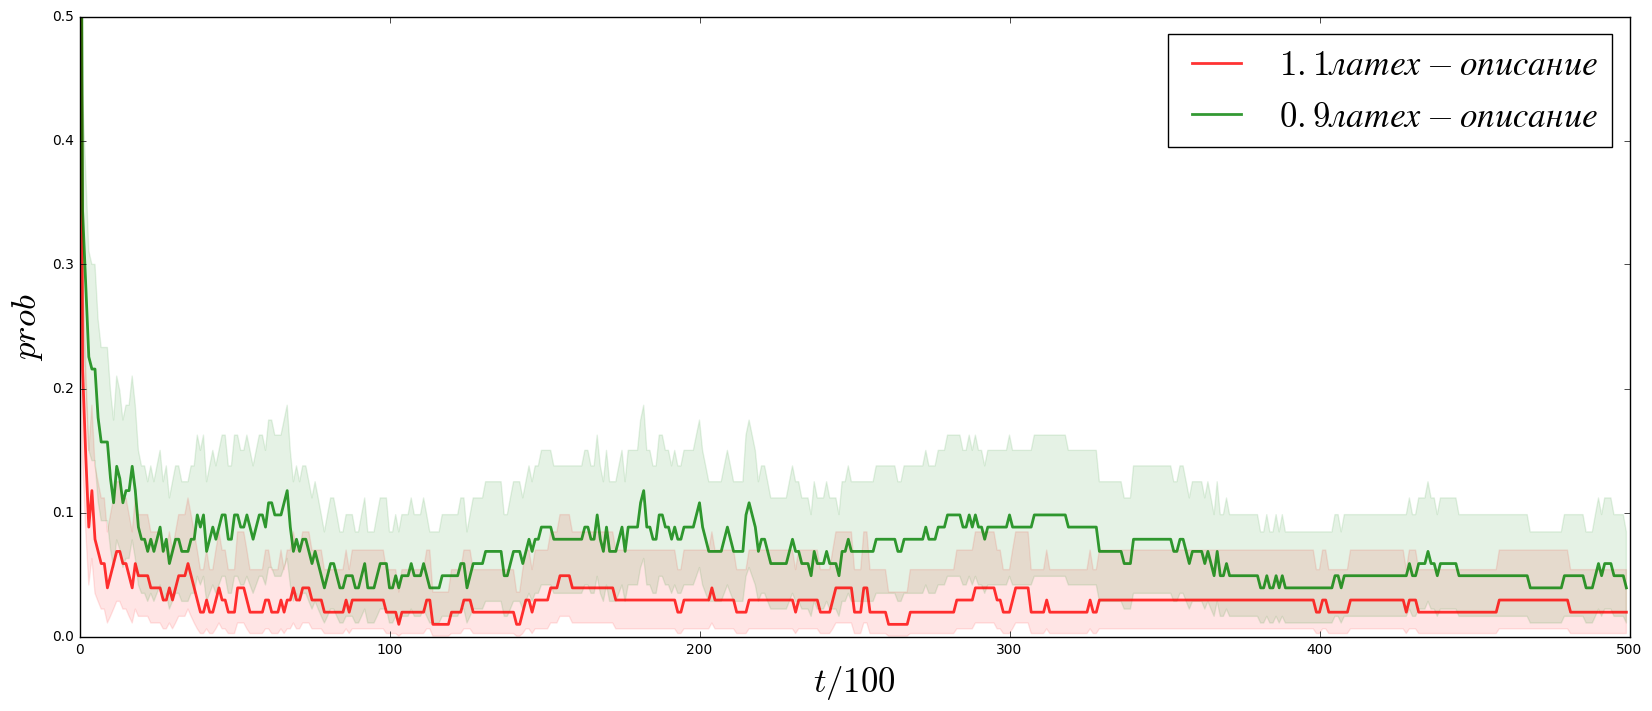

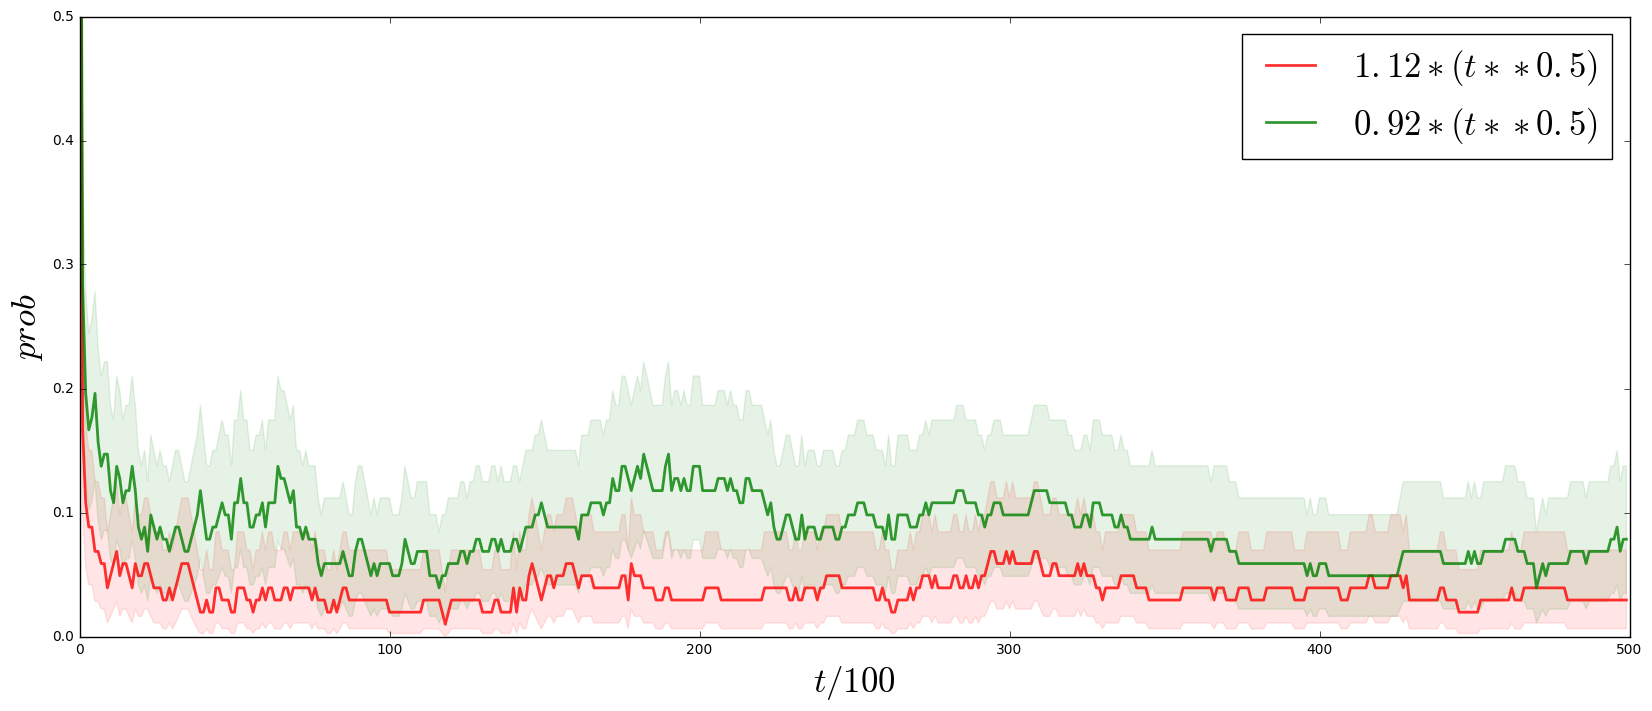

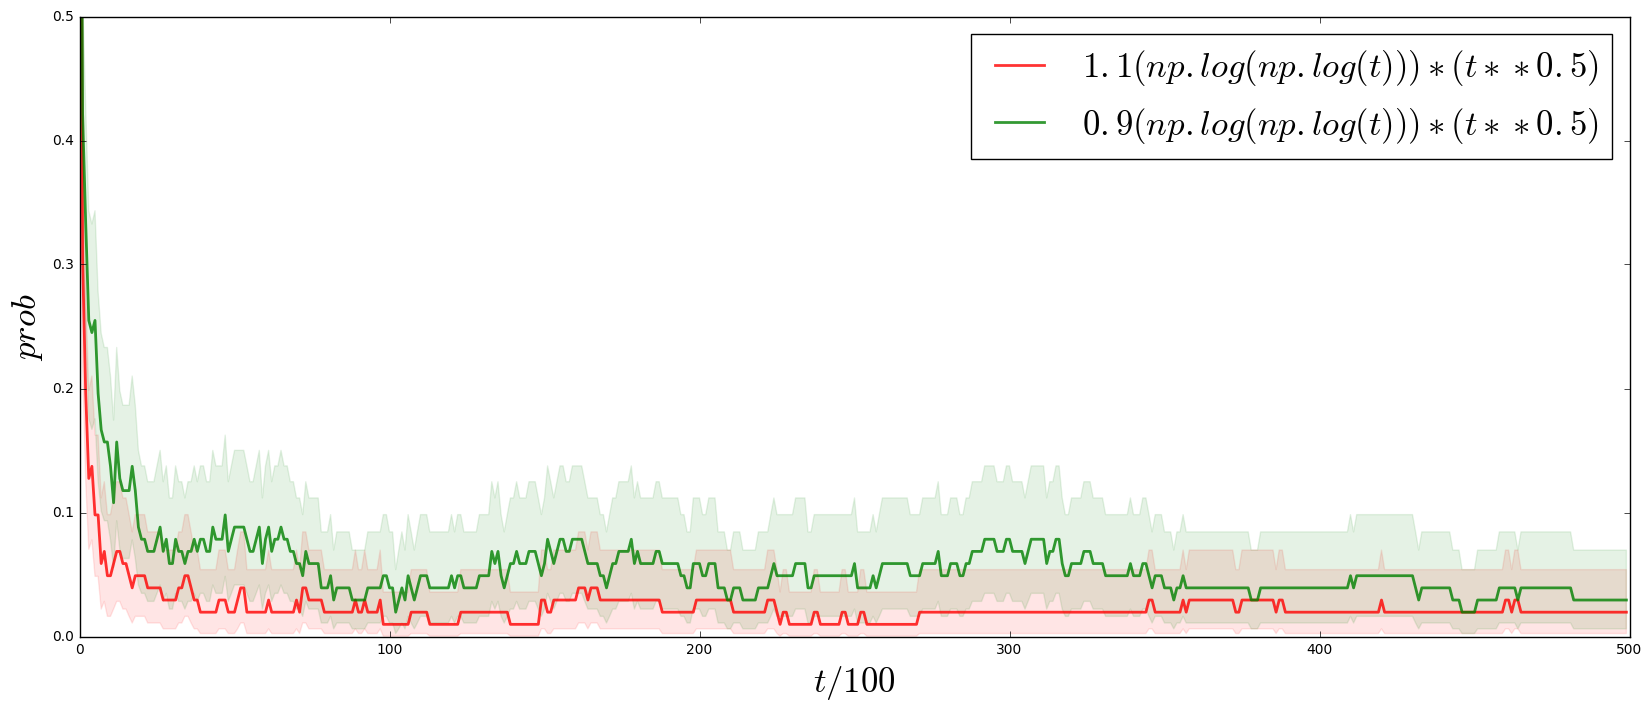

In [14]:
draw_intersection(paths, t, lambda t: ((2. * t * np.log(np.log(t))) ** 0.5), f_descr="латех-описание")
draw_intersection(paths, t, lambda t: 2 * (t**0.5), f_descr="2 * (t**0.5)")
draw_intersection(paths, t, lambda t: (np.log(np.log(t))) * (t**0.5), f_descr="(np.log(np.log(t))) * (t**0.5)")

По графикам видно, что ...

Давайте для надежности разработаем еще один критерий.
Будем считать, сколько раз траектория пересекает границу начиная с текущего момента времени.
Поскольку, у нас данные конечны, ясно, что значения такой функции будут сходиться к нулю.
Но в идеале границу $(1+\varepsilon)f(t)$ они должны пересекать конечное число раз, и функция должна сходиться к нулю, а границу $(1-\varepsilon)f(t)$ --- бесконечное число раз, и значения функции должны быть большими для конечных данных.

In [19]:
def switch_count(values):
    '''Вычисляет, сколько раз в бинарном векторе values меняется знак'''
    ######################
#     print(values)
    return len([1 for i in range(0, len(values) - 1) if values[i] and not values[i + 1]])
    ######################
    
def switch_cum_count(values, border, step=1000):
    '''
    Для набора values возвращает набор чисел --- сколько раз значения values 
    пересекают границу border от текущего момента с шагом step
    '''
    
    outside = np.abs(values) > border
    counts = []
    for t in range(0, len(outside) - 1, step):
        counts.append(switch_count(outside[t:]))
    return np.array(counts)

def draw_switch_curve(paths, t, f, step=1000, f_descr='f(t)', epsilon=0.1, figsize=(15, 6)):
    '''
    Рисует кривую количества пересечений траекторий paths границ (1 \pm epsilon) * f(t)
    от текущего момента с шагом t
    '''
    
    time_indexes = np.arange(0, len(t), step)
    plt.figure(figsize=figsize)
    
    for sign, color in zip([1, -1], ['red', 'green']):
        switch_counts_for_paths = []
        for path in paths:
            switch_counts_for_paths.append(switch_cum_count(path, (1 + sign * epsilon) * f(t), step=step))
    
        plt.plot(t[time_indexes], np.sum(switch_counts_for_paths, axis=0), lw=2,
                 color=color, label='${} {}$'.format(1 + sign * epsilon, f_descr))
        
    plt.xlabel('$t$', fontsize=25)
    plt.ylabel('switch count after $t$', fontsize=16)
    plt.legend(fontsize=25)
    plt.show()    

Внимание! Следующий код может работать долго.

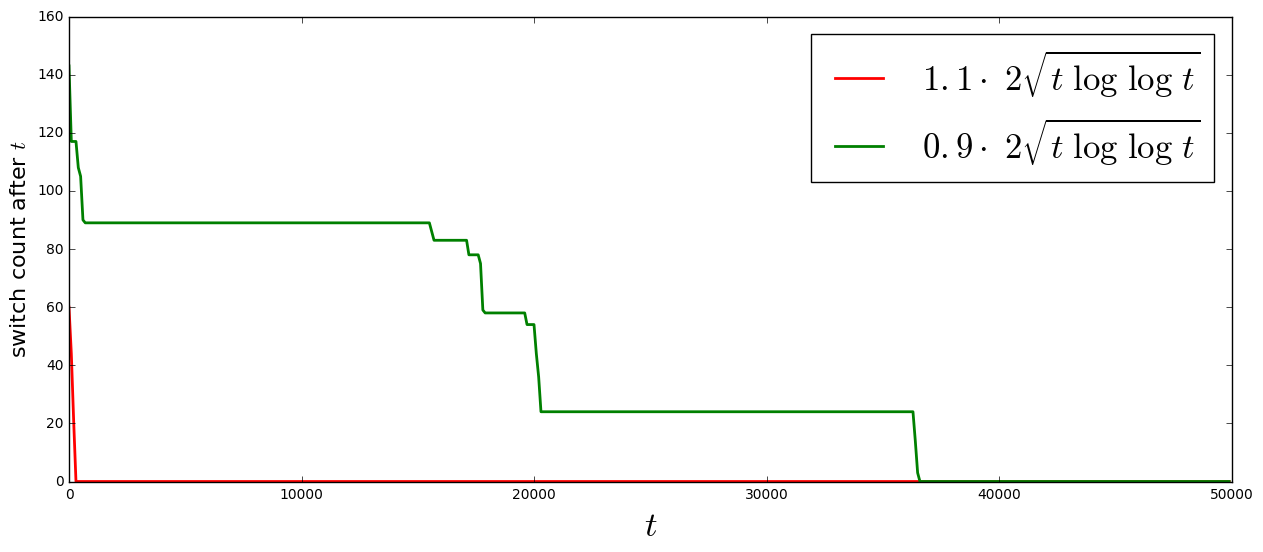

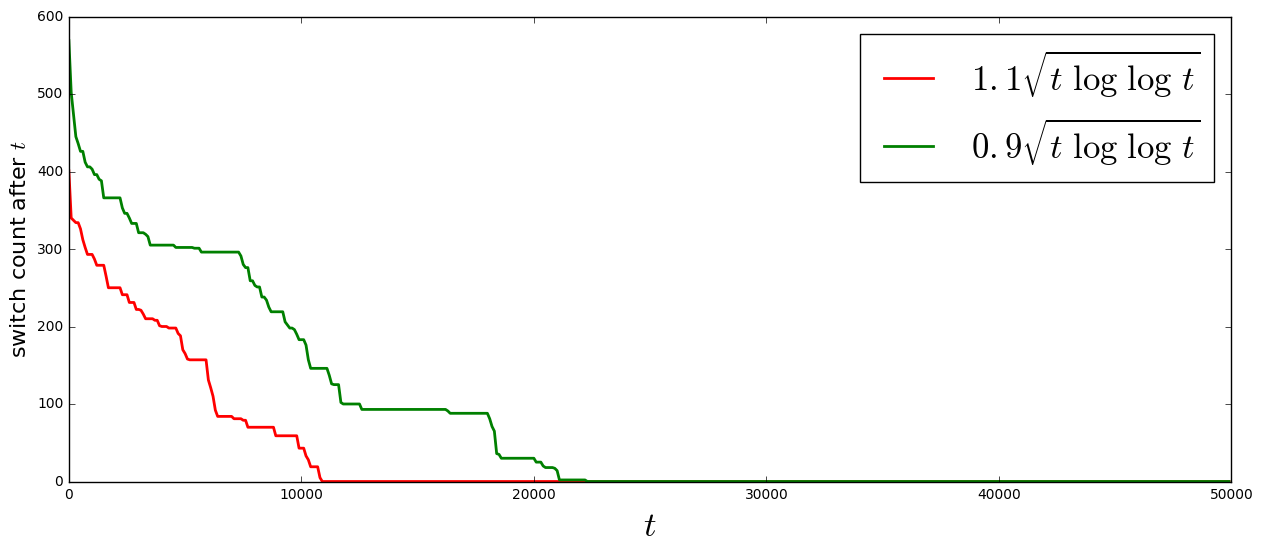

CPU times: user 5min 8s, sys: 2.21 s, total: 5min 10s
Wall time: 5min 15s


In [20]:
%%time
# draw_switch_curve(paths, t, lambda t: lambda t: t**0.5, f_descr='латех-описание')
draw_switch_curve(paths[:5], t, lambda t: 2 * np.sqrt(t * np.log(np.log(t))), f_descr='\cdot\ 2\sqrt{t\ \log\ \log\ t}')
draw_switch_curve(paths[:5], t, lambda t: np.sqrt(t * np.log(np.log(t))), f_descr='\sqrt{t\ \log\ \log\ t}')

Результаты вполне соответствуют ожиданиям --- ...

**Гипотеза:**
...